In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
data = pd.read_csv("SPY.csv")
df = pd.DataFrame(data)

In [215]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7.273000e+03
mean,152.904557,153.793198,151.915252,152.905644,127.347327,8.422043e+07
std,86.279382,86.634793,85.881630,86.292203,92.389788,9.524008e+07
min,43.343750,43.531250,42.812500,43.406250,25.406425,5.200000e+03
25%,101.410004,102.180000,100.260002,101.550003,71.228630,8.309600e+06
50%,128.669998,129.330002,127.750000,128.630005,93.967682,5.911460e+07
75%,195.009995,195.850006,193.960007,194.929993,171.898666,1.190009e+08
max,470.890015,473.540009,468.500000,470.739990,470.739990,8.710263e+08


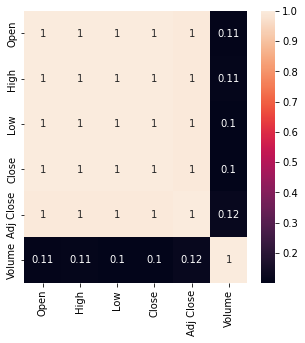

In [174]:
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

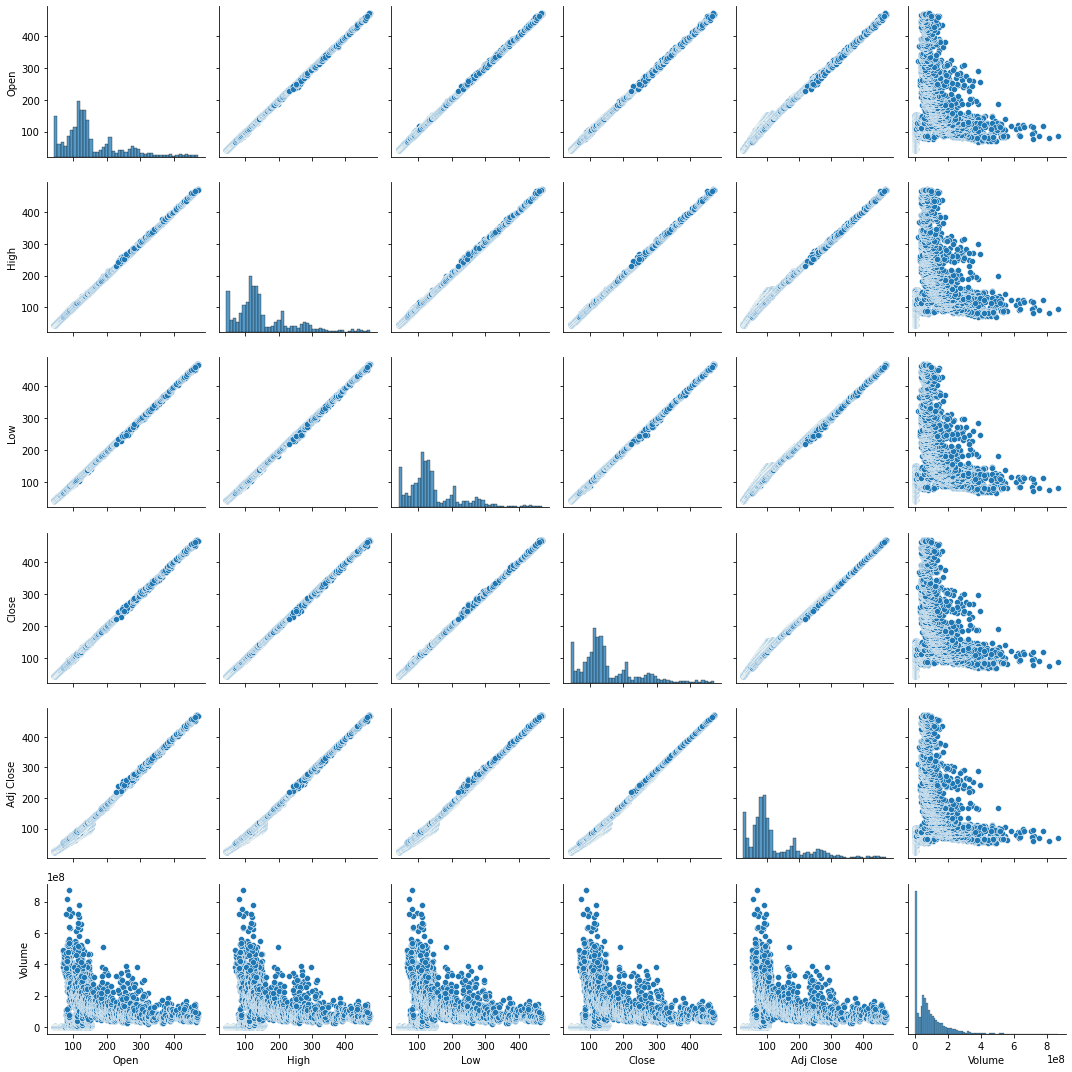

In [175]:
sns.pairplot(df)
plt.tight_layout()

In [217]:
X = df.drop(['Adj Close'], axis=1)
y = df['Adj Close']
X


,Open,High,Low,Close,Volume
0,43.968750,43.968750,43.750000,43.937500,1003200
1,43.968750,44.250000,43.968750,44.250000,480500
2,44.218750,44.375000,44.125000,44.343750,201300
3,44.406250,44.843750,44.375000,44.812500,529400
4,44.968750,45.093750,44.468750,45.000000,531500
...,...,...,...,...,...
7268,468.700012,470.000000,466.829987,469.519989,72238800
7269,468.149994,469.630005,466.140015,466.350006,61272600
7270,469.230011,470.899994,466.510010,470.739990,76949400
7271,470.190002,470.559998,466.269989,466.570007,87724700


In [218]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Close,Volume
0,0.001462,0.001017,0.002202,0.001243,0.001146
1,0.001462,0.001671,0.002716,0.001974,0.000546
2,0.002047,0.001962,0.003083,0.002194,0.000225
3,0.002485,0.003052,0.003671,0.003291,0.000602
4,0.003801,0.003634,0.003891,0.003730,0.000604


In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [237]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [238]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
5818,178.389816,165.571471
5819,179.270966,166.332805
5820,179.414780,162.103358
5821,182.310074,165.633595
5822,182.076294,168.397091


In [239]:
from sklearn.metrics import r2_score
Acc = []
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.7542195513012623


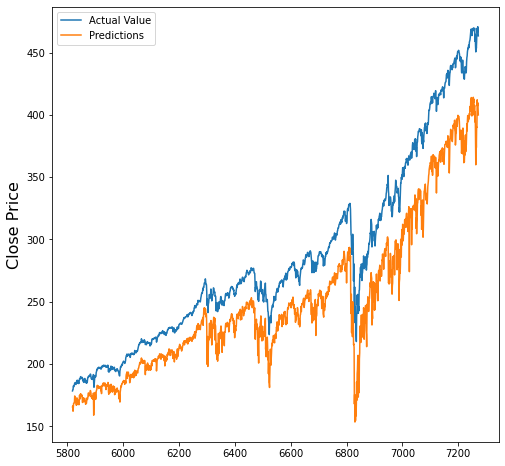

In [240]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [241]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [242]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [243]:
def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [244]:
model_2 = reg()
model_2.fit(X_train, y_train, epochs=50, validation_split=0.3)

Epoch 1/50
128/128 [==============================] - 2s 7ms/step - loss: 1167.4034 - val_loss: 568.6475
Epoch 2/50
128/128 [==============================] - 1s 6ms/step - loss: 10.3183 - val_loss: 482.4881
Epoch 3/50
128/128 [==============================] - 1s 6ms/step - loss: 6.7665 - val_loss: 445.4464
Epoch 4/50
128/128 [==============================] - 1s 6ms/step - loss: 5.7562 - val_loss: 425.6664
Epoch 5/50
128/128 [==============================] - 1s 6ms/step - loss: 5.0236 - val_loss: 398.0018
Epoch 6/50
128/128 [==============================] - 1s 6ms/step - loss: 4.5382 - val_loss: 387.0805
Epoch 7/50
128/128 [==============================] - 1s 6ms/step - loss: 3.9593 - val_loss: 350.7119
Epoch 8/50
128/128 [==============================] - 1s 6ms/step - loss: 3.5506 - val_loss: 333.6702
Epoch 9/50
128/128 [==============================] - 1s 6ms/step - loss: 2.9566 - val_loss: 277.5693
Epoch 10/50
128/128 [==============================] - 1s 6ms/step - loss: 2.5

In [245]:
y_pred_2 = model_2.predict(X_test)

In [246]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
5818,178.389816,152.067429
5819,179.270966,150.740524
5820,179.414780,153.397888
5821,182.310074,154.720383
5822,182.076294,151.927689


In [247]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: -0.06821548539402111


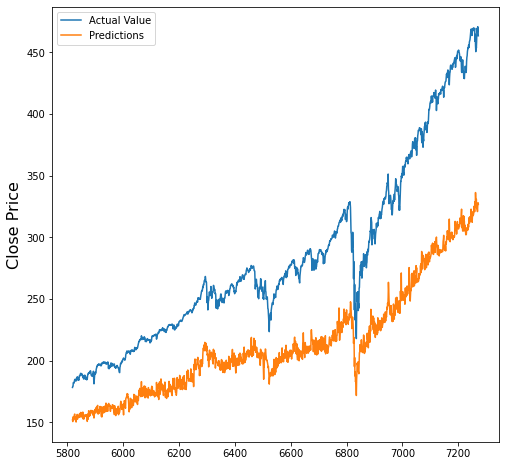

In [248]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [249]:
close = df.reset_index()['Adj Close']
close.head()

0    25.717384
1    25.900293
2    25.955168
3    26.229540
4    26.339285
Name: Adj Close, dtype: float64

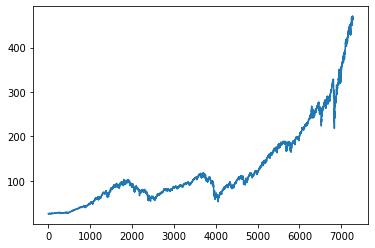

In [250]:
plt.plot(close)
plt.show()

In [251]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [252]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.000717,0.001136,0.001257,0.001874,0.002113,0.002064,0.002062,0.001650,0.001732,0.002021,0.001567,0.000082,0.000041,0.000000,0.000000,0.000142,0.000100,0.000842,0.000965,0.001048,0.000883,0.001748,0.001995,0.001665,0.001501,0.002818,0.002612,0.002736,0.002571,0.001949
1,0.001138,0.001263,0.001886,0.002123,0.002071,0.002064,0.001650,0.001732,0.002021,0.001567,0.000082,0.000041,0.000000,0.000206,0.000206,0.000100,0.000842,0.000965,0.001048,0.000883,0.001748,0.001995,0.001665,0.001501,0.002818,0.002612,0.002736,0.002571,0.001953,0.002237
2,0.001265,0.001894,0.002137,0.002082,0.002071,0.001651,0.001732,0.002021,0.001567,0.000082,0.000041,0.000000,0.000206,0.000412,0.000165,0.000842,0.000965,0.001048,0.000883,0.001748,0.001995,0.001665,0.001501,0.002818,0.002612,0.002736,0.002571,0.001953,0.002242,0.002237
3,0.001897,0.002146,0.002095,0.002082,0.001657,0.001734,0.002021,0.001567,0.000082,0.000041,0.000000,0.000206,0.000412,0.000371,0.000906,0.000965,0.001048,0.000883,0.001748,0.001995,0.001665,0.001501,0.002818,0.002612,0.002736,0.002571,0.001953,0.002242,0.002242,0.001867
4,0.002150,0.002104,0.002095,0.001665,0.001740,0.002023,0.001567,0.000082,0.000041,0.000000,0.000206,0.000412,0.000371,0.001113,0.001029,0.001048,0.000883,0.001748,0.001995,0.001665,0.001501,0.002818,0.002612,0.002736,0.002571,0.001953,0.002242,0.002242,0.001871,0.002237


In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [254]:
model_3 = reg()
model_3.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
145/145 [==============================] - 3s 16ms/step - loss: 867.1729 - val_loss: 27.8791
Epoch 2/50
145/145 [==============================] - 2s 14ms/step - loss: 7.2298 - val_loss: 20.7872
Epoch 3/50
145/145 [==============================] - 2s 15ms/step - loss: 7.0084 - val_loss: 14.2438
Epoch 4/50
145/145 [==============================] - 2s 15ms/step - loss: 7.1198 - val_loss: 13.6680
Epoch 5/50
145/145 [==============================] - 2s 15ms/step - loss: 6.7866 - val_loss: 13.6124
Epoch 6/50
145/145 [==============================] - 2s 15ms/step - loss: 6.5673 - val_loss: 12.9861
Epoch 7/50
145/145 [==============================] - 2s 15ms/step - loss: 6.3699 - val_loss: 13.5521
Epoch 8/50
145/145 [==============================] - 2s 15ms/step - loss: 6.3566 - val_loss: 14.6884
Epoch 9/50
145/145 [==============================] - 2s 15ms/step - loss: 6.4092 - val_loss: 11.5853
Epoch 10/50
145/145 [==============================] - 2s 17ms/step - loss: 6.18

In [255]:
y_pred_3 = model_3.predict(X_test)

In [256]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,181.779587,178.714996
1,182.831558,179.008774
2,183.991470,179.457916
3,184.714493,180.200363
4,184.976578,180.970490


In [257]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.991536496570302


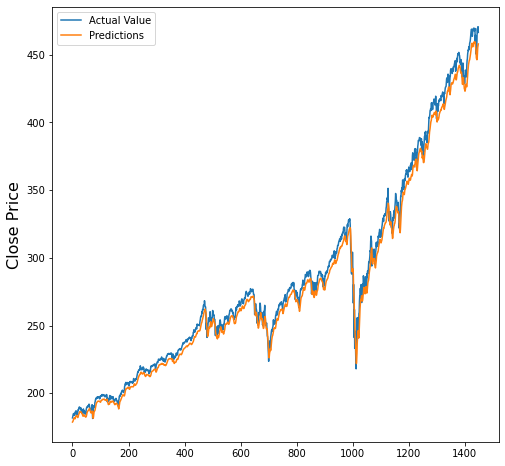

In [258]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [259]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
145/145 [==============================] - 1s 3ms/step - loss: 5870.0728 - val_loss: 18763.0156
Epoch 2/100
145/145 [==============================] - 0s 3ms/step - loss: 1670.1495 - val_loss: 71.9276
Epoch 3/100
145/145 [==============================] - 0s 2ms/step - loss: 12.8372 - val_loss: 35.7544
Epoch 4/100
145/145 [==============================] - 0s 2ms/step - loss: 11.4957 - val_loss: 36.4156
Epoch 5/100
145/145 [==============================] - 0s 2ms/step - loss: 10.2954 - val_loss: 25.0937
Epoch 6/100
145/145 [==============================] - 0s 2ms/step - loss: 9.2714 - val_loss: 20.7969
Epoch 7/100
145/145 [==============================] - 0s 2ms/step - loss: 8.4650 - val_loss: 17.8115
Epoch 8/100
145/145 [==============================] - 0s 2ms/step - loss: 7.8423 - val_loss: 15.2276
Epoch 9/100
145/145 [==============================] - 0s 3ms/step - loss: 7.4159 - val_loss: 15.0596
Epoch 10/100
145/145 [==============================] - 0s 3ms/step - 

In [260]:
y_pred_2 = model_2.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9958397512549491


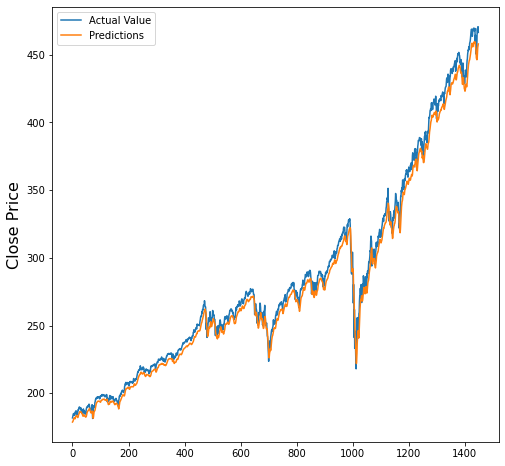

In [261]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

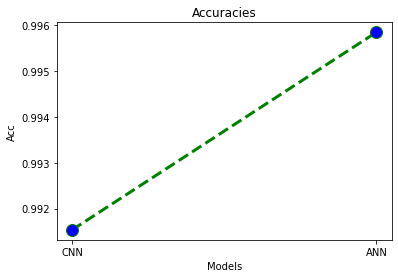

In [262]:
plt.plot(range(2), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(2), ['CNN', 'ANN'])
plt.show()